In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../utils')
print(sys.path)
import numpy as np
from load_dataset import *
import os

['/home/shiqi/code/Project2-sensor-case/model_combination_Argos/pca_from_formulation', '/home/shiqi/anaconda3/envs/torch/lib/python39.zip', '/home/shiqi/anaconda3/envs/torch/lib/python3.9', '/home/shiqi/anaconda3/envs/torch/lib/python3.9/lib-dynload', '', '/home/shiqi/anaconda3/envs/torch/lib/python3.9/site-packages', '../utils']


In [3]:
import yaml

config_path = '/home/shiqi/code/Project2-sensor-case/model_combination_Argos/pca_from_formulation/output_nonlinear/experiment_2/config_test_linear_model.yaml'
with open(config_path, 'r') as file:
    config = yaml.safe_load(file)

In [4]:
import torch

# Save dir
save_dir = config['save_dir']
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device:', device)

# todo: multi nu
nu_list = config['nu_list']

# Data loader
x_dataset, u_dataset, nu_dataset = [], [], []
for i in range(len(nu_list)):
    nu = nu_list[i]
    config['data_dir'] = config['data_dir_list'][i]
    x_data, u_data, nu_data, n_features, n_inputs = data_preparation_xu(config, nu_list, nu)
    x_dataset.append(x_data)
    u_dataset.append(u_data)
    nu_dataset.append(nu_data)
    print(np.max(x_data))
    print(np.min(x_data))
    print(nu_data.shape)
    print(nu_data[1, :])

Device: cuda
3.068316699197335
-3.0718971957717702
(6258, 1)
[1.]


In [5]:
from sklearn.preprocessing import StandardScaler
scaler_x_set = []
x_dataset_scaled = []
for x_data in x_dataset:
    scaler_x = StandardScaler()
    x_data = scaler_x.fit_transform(x_data)
    x_dataset_scaled.append(x_data)
    scaler_x_set.append(scaler_x)

In [6]:
x_data_scaled = np.concatenate(x_dataset_scaled, axis=0)
x_data_scaled.shape

(6258, 6957)

In [7]:
print(np.mean(x_data_scaled, axis=0))
print(np.std(x_data_scaled, axis=0))

[ 8.26369263e-17 -2.31695633e-17  1.79005278e-17 ... -1.66054450e-17
 -8.51561284e-18  4.44585954e-17]
[1. 1. 1. ... 1. 1. 1.]


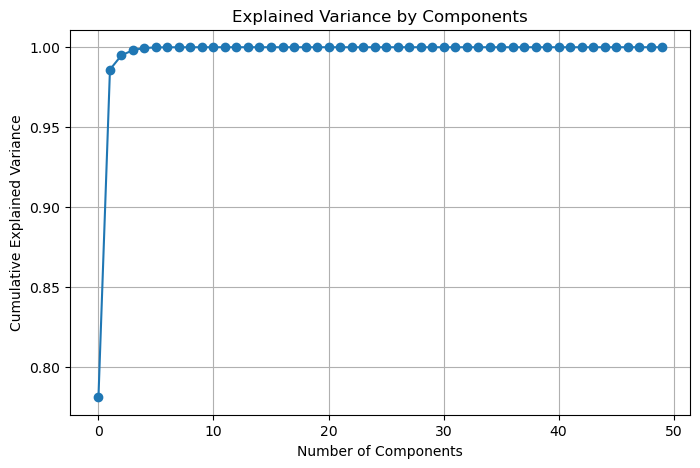

In [8]:
# 初始化PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=50)  # 选择一个初始的维度数目，例如100
x_pca = pca.fit_transform(x_data_scaled)

# 解释的方差比例
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# 可视化累积解释方差
plt.figure(figsize=(8, 5))
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
# plt.yscale('log')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()


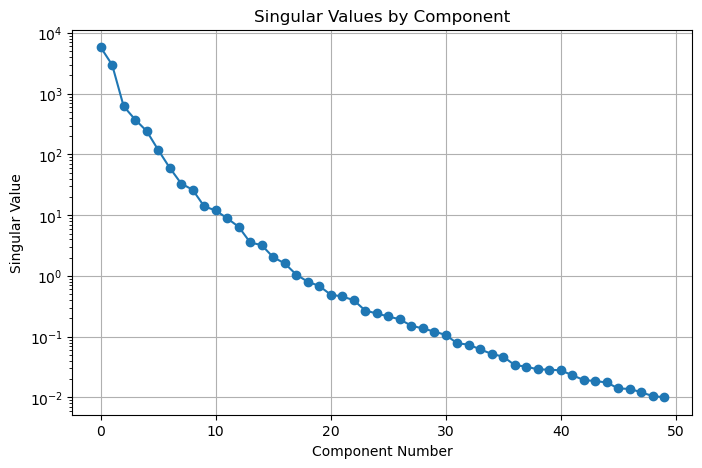

In [9]:
singular_values = pca.singular_values_

# Plot the singular values
plt.figure(figsize=(8, 5))
plt.plot(singular_values, marker='o')
plt.xlabel('Component Number')
plt.ylabel('Singular Value')
plt.title('Singular Values by Component')
plt.yscale('log')
plt.grid(True)
plt.show()

In [10]:
singular_values

array([5.83241233e+03, 2.98551300e+03, 6.21485188e+02, 3.75546080e+02,
       2.43226900e+02, 1.19146168e+02, 6.05249958e+01, 3.32675832e+01,
       2.62158065e+01, 1.40138889e+01, 1.19713428e+01, 8.90420949e+00,
       6.44408361e+00, 3.56305314e+00, 3.21736833e+00, 2.03467916e+00,
       1.61235315e+00, 1.05618057e+00, 8.05223217e-01, 6.86158534e-01,
       4.92226954e-01, 4.60123341e-01, 3.99559657e-01, 2.69989306e-01,
       2.41356373e-01, 2.15747878e-01, 1.93473327e-01, 1.52072023e-01,
       1.36936435e-01, 1.21506742e-01, 1.07012884e-01, 7.77806405e-02,
       7.42068646e-02, 6.17622284e-02, 5.21395891e-02, 4.68901464e-02,
       3.41054042e-02, 3.21817640e-02, 2.90064607e-02, 2.87075740e-02,
       2.79518556e-02, 2.32618959e-02, 1.93725980e-02, 1.86073653e-02,
       1.76584922e-02, 1.40604029e-02, 1.38469974e-02, 1.21625315e-02,
       1.05235774e-02, 1.00927444e-02])

In [11]:
cumulative_explained_variance

array([0.78133787, 0.98606735, 0.99493899, 0.99817842, 0.99953725,
       0.99986332, 0.99994746, 0.99997288, 0.99998867, 0.99999318,
       0.99999647, 0.99999829, 0.99999924, 0.99999953, 0.99999977,
       0.99999987, 0.99999993, 0.99999995, 0.99999997, 0.99999998,
       0.99999998, 0.99999999, 0.99999999, 0.99999999, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

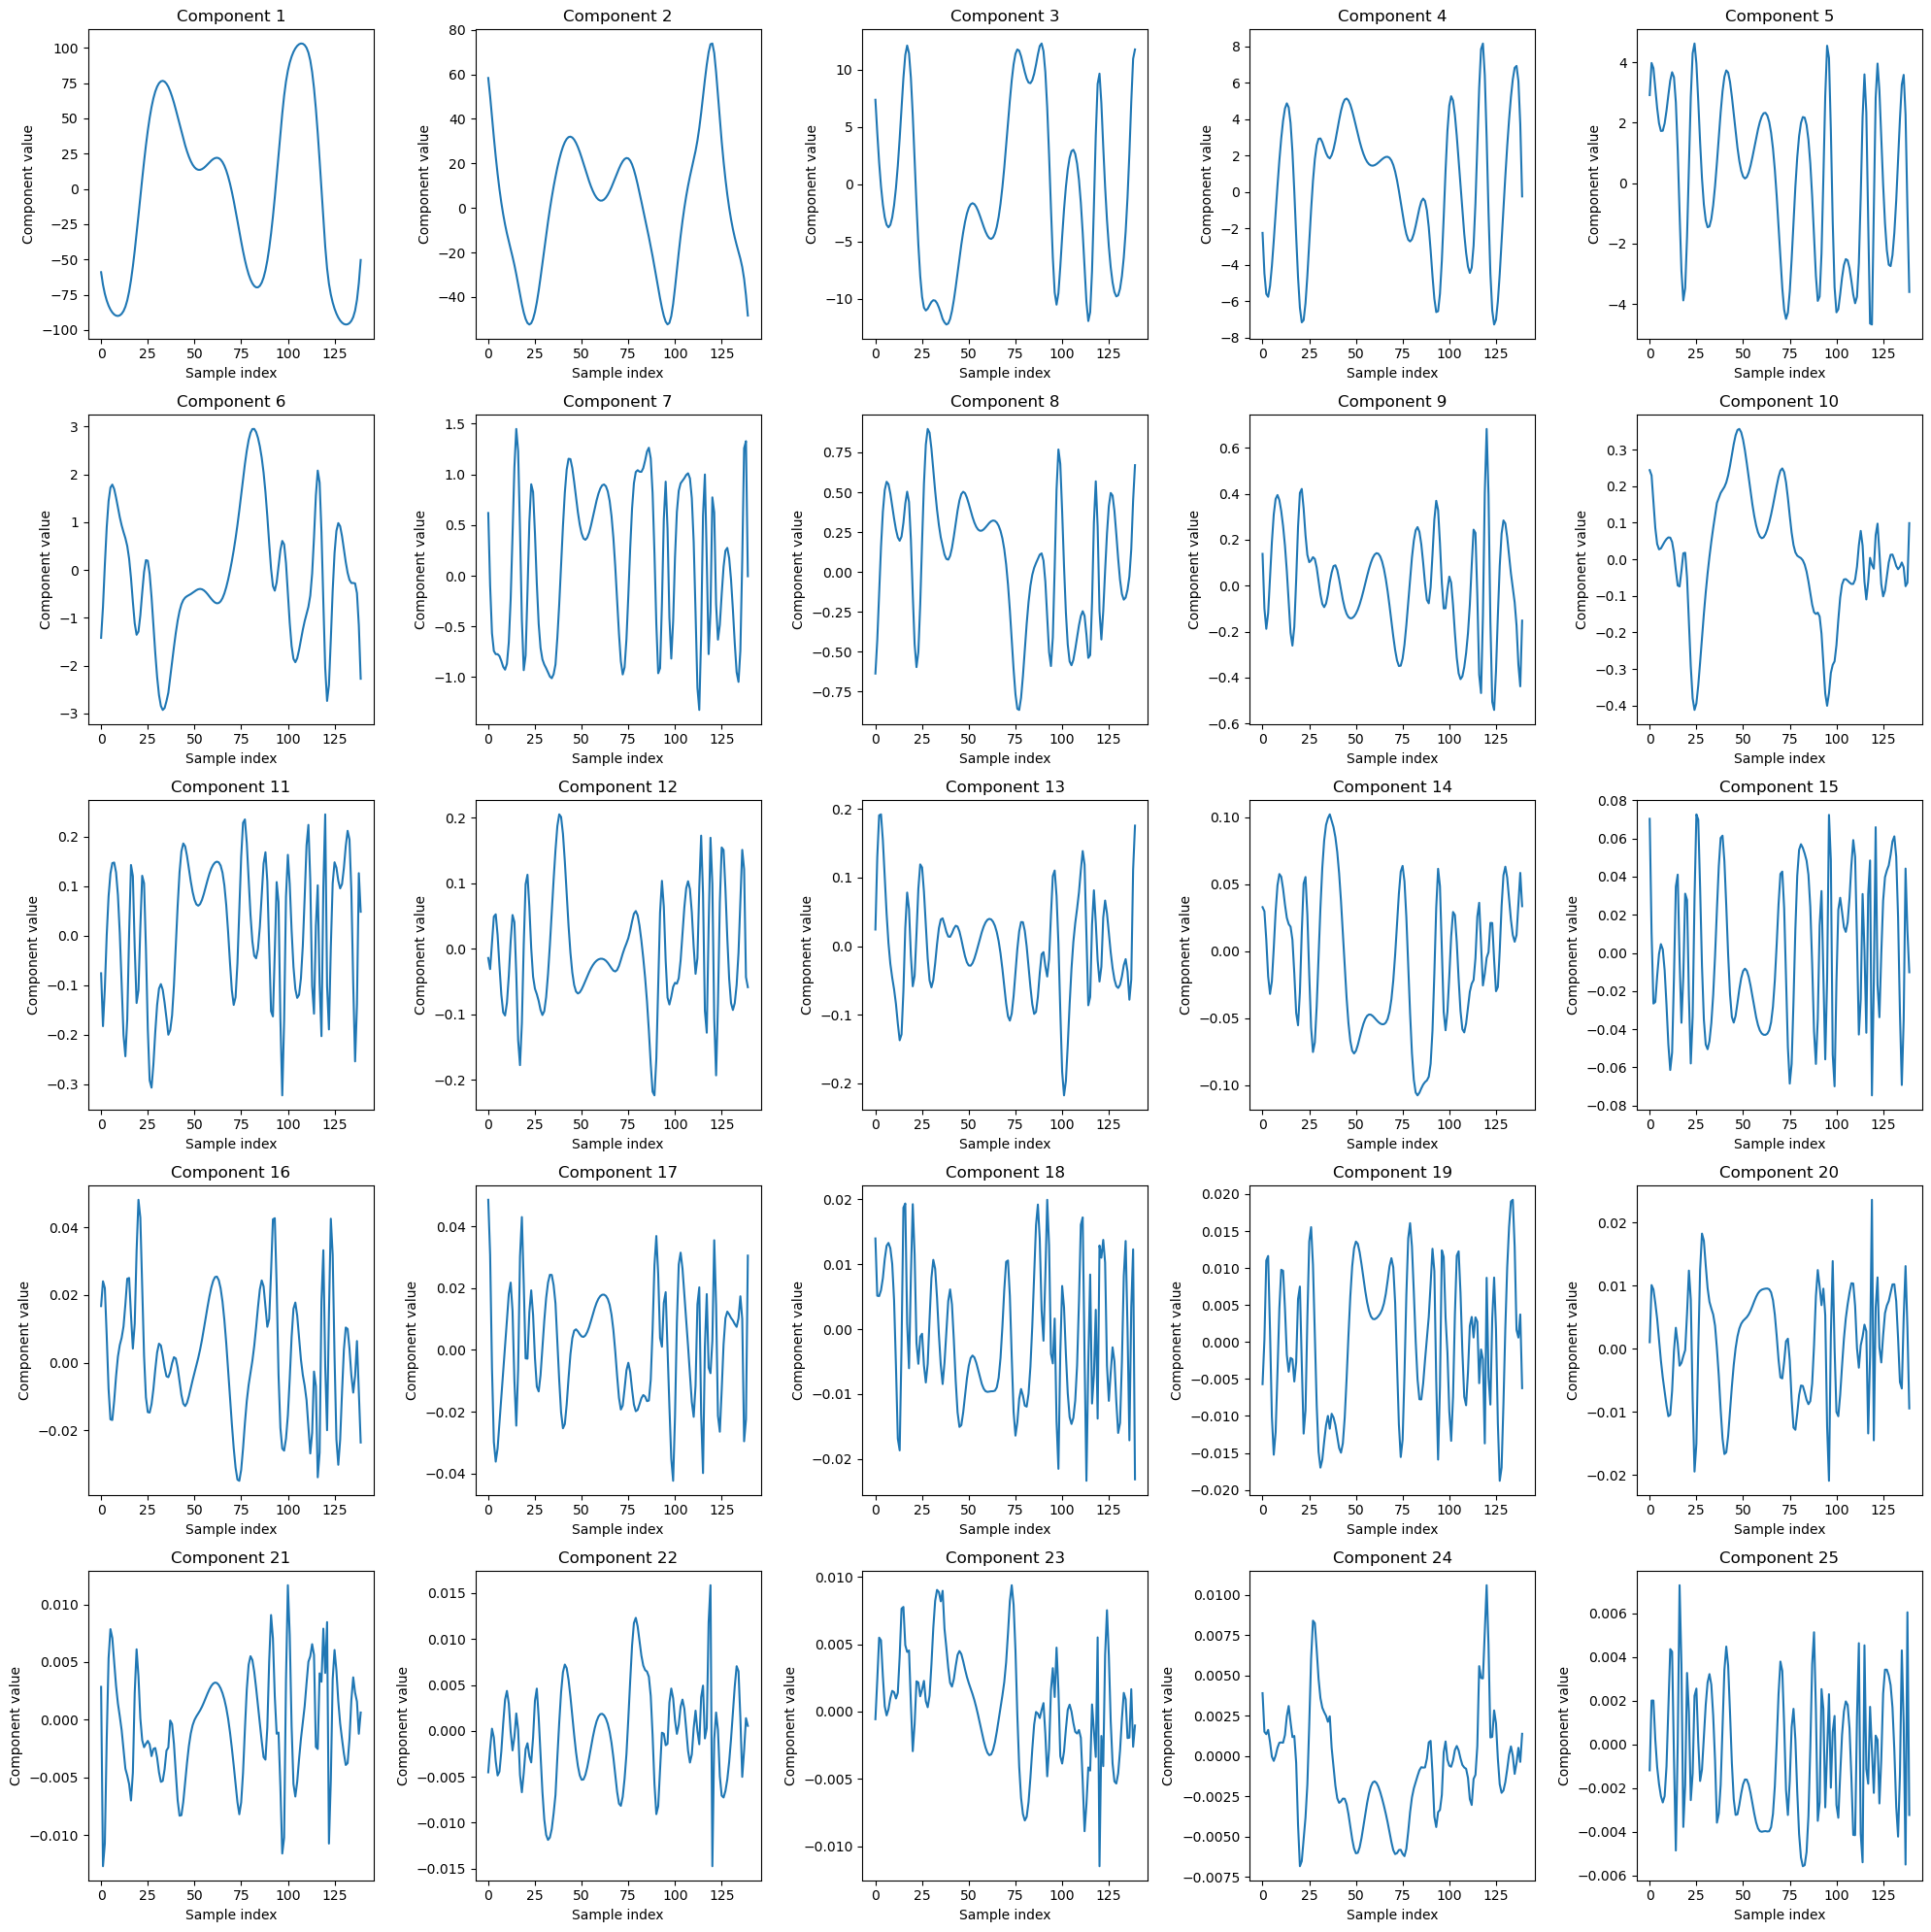

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Plotting the first 150 samples of each PCA component in a row of 5 subplots
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))
for i in range(25):
    row = i // 5  # Determining the row of the subplot
    col = i % 5   # Determining the column of the subplot
    axes[row, col].plot(x_pca[:140, i])  # Corrected to plot with dots for clarity
    axes[row, col].set_title(f'Component {i+1}')
    axes[row, col].set_xlabel('Sample index')
    axes[row, col].set_ylabel('Component value')

plt.tight_layout()
plt.show()
